In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [2]:
mydata = datasets.load_boston() # 创建数据集

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
x = mydata.data
y = mydata.target  # 划分特征和标签

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [5]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()

In [6]:
models = [lr, rd, ls]
names = ['lr', 'rd', 'ls']

In [7]:
for model,name in zip(models, names):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print("%s模型的准确率是: %.5f"% (name, score))

lr模型的准确率是: 0.71143
rd模型的准确率是: 0.71197
ls模型的准确率是: 0.63968


In [9]:
scores=[]
alphas=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,10,50]
for i,model in enumerate(models):
    scores.append([])
    for alpha in alphas:
        model.alpha=alpha
        model.fit(x_train,y_train)
        score = model.score(x_test,y_test)
        scores[i].append(score)
print(scores)

[[0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066, 0.711428521420066], [0.7114293220814647, 0.7114325206164184, 0.7114365095500452, 0.7114680543200401, 0.7115065814752781, 0.7117811566240155, 0.7120510534871415, 0.71261305546761, 0.711973130136397, 0.7047993475829302, 0.6938912414815676], [0.7114439972021315, 0.7115047481347243, 0.7115781089755289, 0.7120620737650931, 0.7124089465940033, 0.7048359696045239, 0.7007097425147054, 0.6801245701626153, 0.6396795324829754, 0.5128970578440781, 0.2134279102091694]]


In [ ]:
import matplotlib.pyplot as plt

lr模型的最大准确率是0.71143
rd模型的最大准确率是0.71261
ls模型的最大准确率是0.71241


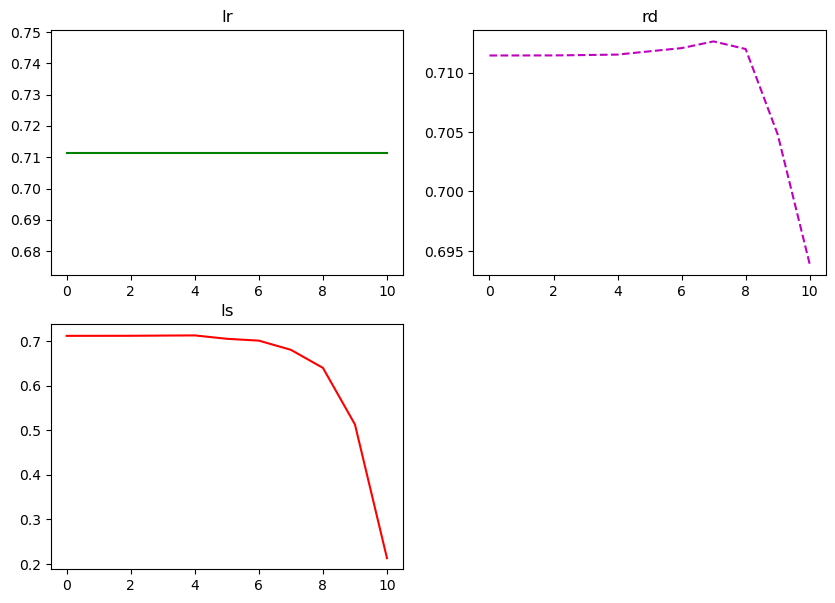

In [13]:
fig=plt.figure(figsize=(10,7))
line_sytle = ['g-', 'm--', 'r']
for i,name in enumerate(names):
    plt.subplot(2,2,i+1)
    plt.plot(scores[i], line_sytle[i])
    plt.title(name)
    print("%s模型的最大准确率是%.5f"%(name, max(scores[i])))
plt.show()